In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

In [2]:
from typing import Tuple, Literal

In [3]:
# To create the required logic gates

def create_logic_data(logic_type: str) -> Tuple[np.ndarray, np.ndarray]:
  X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

  if logic_type.upper() == "NAND":
    y = np.array([[1], [1], [1], [0]])
  elif logic_type.upper() == "NOR":
    y = np.array([[1], [0], [0], [0]])
  elif logic_type.upper() == "XOR":
    y = np.array([[0], [1], [1], [0]])
  elif logic_type.upper() == "XNOR":
    y = np.array([[1], [0], [0], [1]])

  else:
    raise ValueError("Invalid Logic")

  return X, y

In [25]:
gates = ["NAND", "NOR", "XOR", "XNOR"]

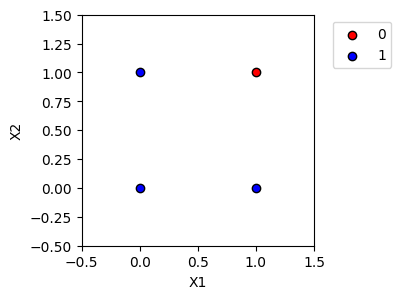

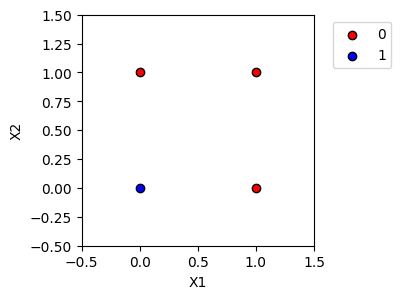

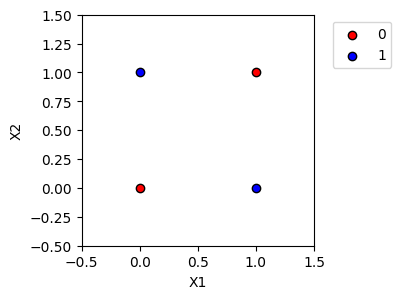

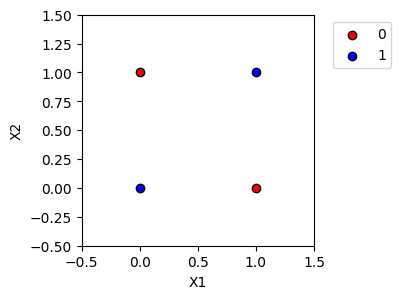

In [26]:
for gate in gates:
  X, y = create_logic_data(gate)
  plot_points(X, y)

In [27]:
def preprocess(X, y):
  X_temp = np.hstack((-np.ones((X.shape[0], 1)), X))
  X_preprocessed = np.where(y == 0, -X_temp, X_temp)
  return X_preprocessed

def perceptron(X_preprocessed, max_iter=1000):
  w = np.random.rand(3, 1)
  iter_no = 0
  while iter_no < max_iter:
    num_errors = 0
    for row in X_preprocessed:
            if np.dot(row, w) <= 0:
              num_errors += 1
              w += row.reshape(-1, 1)
    if num_errors == 0:
      break
    iter_no += 1

  if iter_no == max_iter:
    print("The algorithm did not converge")
  else:
    print("The algorithm converged in {} iterations".format(iter_no))

  return w

Gate: nand
X after preprocessing: [[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [ 1. -1. -1.]]
The algorithm converged in 5 iterations
w: [[-2.40844354]
 [-1.72541543]
 [-0.85778671]]


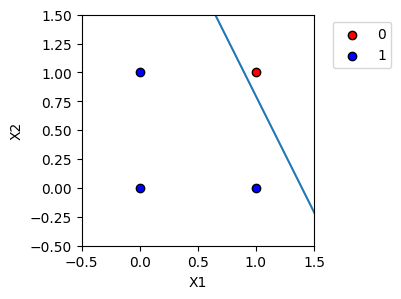

--------------------------------------------------
Gate: nor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [ 1. -1. -1.]]
The algorithm converged in 5 iterations
w: [[-0.61573322]
 [-1.55887822]
 [-1.50032125]]


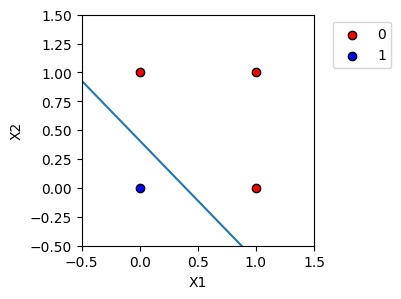

--------------------------------------------------
Gate: xor
X after preprocessing: [[ 1. -0. -0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [ 1. -1. -1.]]
The algorithm did not converge
w: [[-0.95364029]
 [-1.46049932]
 [-0.27521275]]


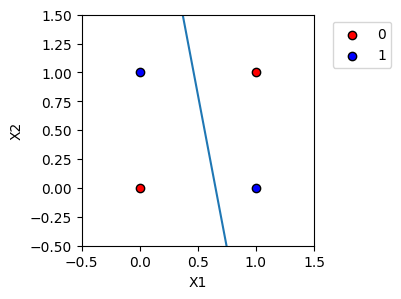

--------------------------------------------------
Gate: xnor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
The algorithm did not converge
w: [[0.43927337]
 [0.8166857 ]
 [0.34761717]]


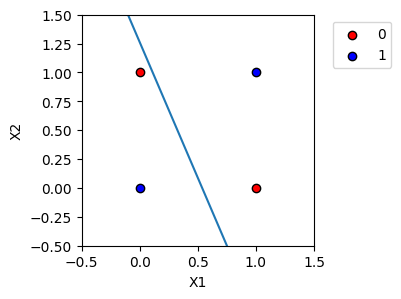

--------------------------------------------------


In [32]:
for gate in gates:
  print(f"Gate: {gate.lower()}")
  X, y = create_logic_data(gate)

  X_preprocessed = preprocess(X, y)
  print(f"X after preprocessing: {X_preprocessed}")

  w = perceptron(X_preprocessed)
  print(f"w: {w}")

  plot_decision_boundary(X, y, w)
  print("-" * 50)

In [33]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def preprocess_sigmoid(X, y):
  X_preprocessed = np.hstack((-np.ones((X.shape[0], 1)), X))
  return X_preprocessed

def perceptron_sigmoid_mse(X_preprocessed, epochs=10000, lr=0.01):
  w = np.random.rand(3, 1)
  for epoch in range(epochs):
    for i in range(X_preprocessed.shape[0]):
      row = X_preprocessed[i]
      y_true = y[i]
      y_pred = sigmoid(np.dot(row, w))
      error = y_pred - y_true
      w -= lr * error * row.reshape(-1, 1) * y_pred * (1 - y_pred)

  return w

Gate: nand
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[-3.87429679]
 [-2.49770653]
 [-2.49687869]]


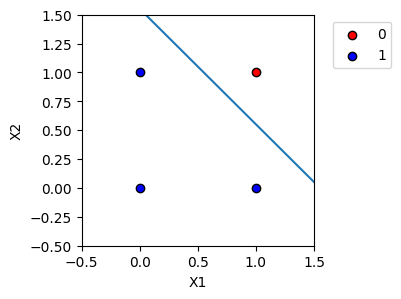

--------------------------------------------------
Gate: nor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[-1.30542423]
 [-3.24046355]
 [-3.23223098]]


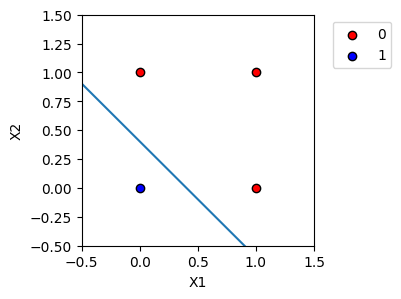

--------------------------------------------------
Gate: xor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[0.01745953]
 [0.01334276]
 [0.01454319]]


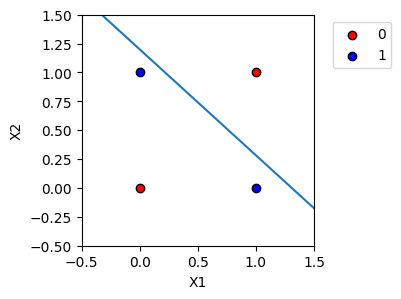

--------------------------------------------------
Gate: xnor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[0.01566923]
 [0.01432115]
 [0.01365792]]


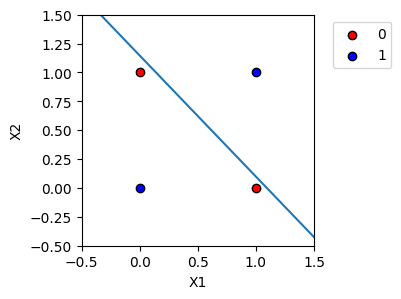

--------------------------------------------------


In [34]:
for gate in gates:
  print(f"Gate: {gate.lower()}")
  X, y = create_logic_data(gate)
  X_preprocessed_sigmoid = preprocess_sigmoid(X, y)
  print(f"X after preprocessing: {X_preprocessed}")

  w = perceptron_sigmoid_mse(X_preprocessed_sigmoid)
  print(f"w: {w}")

  plot_decision_boundary(X, y, w)
  print("-" * 50)

In [35]:
def perceptron_sigmoid_bce(X_preprocessed, epochs=10000, lr=0.1):
  w = np.random.rand(3, 1)
  for epoch in range(epochs):
    for i in range(X_preprocessed.shape[0]):
      row = X_preprocessed[i]
      y_true = y[i]
      y_pred = sigmoid(np.dot(row, w))
      error = y_pred - y_true
      w -= lr * error * row.reshape(-1, 1)

  return w

Gate: nand
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[-15.51175384]
 [-10.22940615]
 [-10.22877474]]


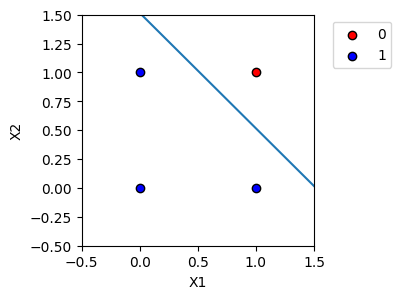

--------------------------------------------------
Gate: nor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[ -5.28087434]
 [-11.48168891]
 [-11.48208088]]


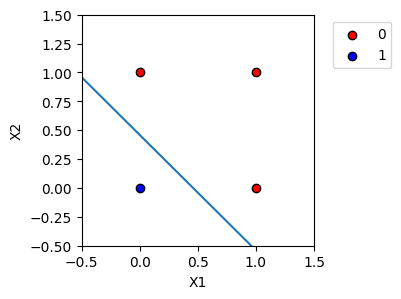

--------------------------------------------------
Gate: xor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[-0.05128176]
 [-0.10256353]
 [-0.05128176]]


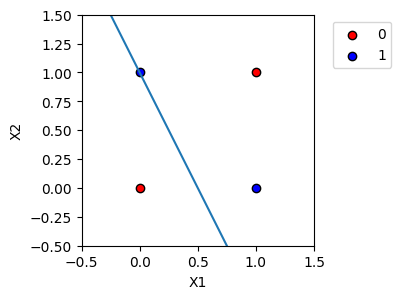

--------------------------------------------------
Gate: xnor
X after preprocessing: [[-1.  0.  0.]
 [ 1. -0. -1.]
 [ 1. -1. -0.]
 [-1.  1.  1.]]
w: [[0.05128176]
 [0.10256353]
 [0.05128176]]


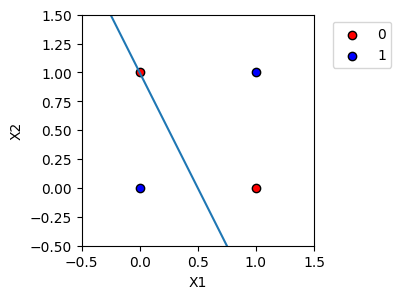

--------------------------------------------------


In [36]:
for gate in gates:
  print(f"Gate: {gate.lower()}")
  X, y = create_logic_data(gate)
  X_preprocessed_sigmoid = preprocess_sigmoid(X, y)
  print(f"X after preprocessing: {X_preprocessed}")

  w = perceptron_sigmoid_bce(X_preprocessed_sigmoid)
  print(f"w: {w}")

  plot_decision_boundary(X, y, w)
  print("-" * 50)